<a href="https://colab.research.google.com/github/Nivethanajacob/ict_project1/blob/main/Casestudy_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




In [37]:
adult_data=pd.read_csv('/content/adult_dataset.csv')
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [38]:
adult_data.duplicated().sum()

np.int64(2)

In [39]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9541 entries, 0 to 9540
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9064 non-null   float64
 1   workclass       9059 non-null   object 
 2   fnlwgt          9541 non-null   int64  
 3   education       9541 non-null   object 
 4   education-num   9541 non-null   int64  
 5   marital-status  9541 non-null   object 
 6   occupation      9048 non-null   object 
 7   relationship    9541 non-null   object 
 8   race            9540 non-null   object 
 9   sex             9540 non-null   object 
 10  capital-gain    9540 non-null   float64
 11  capital-loss    9540 non-null   float64
 12  hours-per-week  9068 non-null   float64
 13  native-country  9057 non-null   object 
 14  income          9540 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 1.1+ MB


In [40]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,9064.000000,9.541000e+03,9541.000000,9540.000000,9540.000000,9068.000000
mean,38.464585,1.903517e+05,10.071691,1059.064675,89.412369,40.562969
std,13.956501,1.056932e+05,2.543273,7285.378516,404.195078,12.655906
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.184810e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.790080e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.386110e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.226583e+06,16.000000,99999.000000,4356.000000,225.000000


In [41]:
adult_data.shape


(9541, 15)

In [42]:
adult_data.size

143115

In [43]:
adult_data.nunique()

,0
age,74
workclass,9
fnlwgt,8160
education,16
education-num,16
marital-status,7
occupation,15
relationship,7
race,5
sex,2


In [44]:
adult_data.drop_duplicates(inplace=True)

In [45]:
adult_data.duplicated().sum()

np.int64(0)

In [46]:
adult_data.isnull().sum()

,0
age,477
workclass,482
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,493
relationship,0
race,1
sex,1


#Handle missing values

In [47]:
adult_data['age']=adult_data['age'].fillna(adult_data['age'].median())
adult_data['hours-per-week']=adult_data['hours-per-week'].fillna(adult_data['hours-per-week'].median())

adult_data['workclass']=adult_data['workclass'].fillna(adult_data['workclass'].mode()[0])
adult_data['occupation']=adult_data['occupation'].fillna(adult_data['occupation'].mode()[0])
adult_data['native-country']=adult_data['native-country'].fillna(adult_data['native-country'].mode()[0])


In [48]:
adult_data[adult_data.isin(['?']).any(axis=1)].index

Index([  14,   27,   38,   51,   61,   69,   77,   93,  106,  128,
       ...
       9418, 9452, 9477, 9484, 9490, 9500, 9503, 9531, 9536, 9537],
      dtype='int64', length=718)

In [49]:
adult_data.replace('?', np.nan, inplace=True)
adult_data[adult_data.isnull().any(axis=1)]
for col in adult_data.select_dtypes(include='object'):
    adult_data[col].fillna(adult_data[col].mode()[0], inplace=True)

for col in adult_data.select_dtypes(include='int64'):
    adult_data[col].fillna(adult_data[col].median(), inplace=True)

/tmp/ipython-input-319427616.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data[col].fillna(adult_data[col].mode()[0], inplace=True)
/tmp/ipython-input-319427616.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [50]:
adult_data[adult_data.isin(['?']).any(axis=1)].index

Index([], dtype='int64')

In [51]:

adult_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


#Outliers

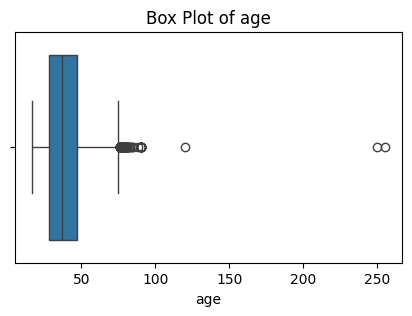

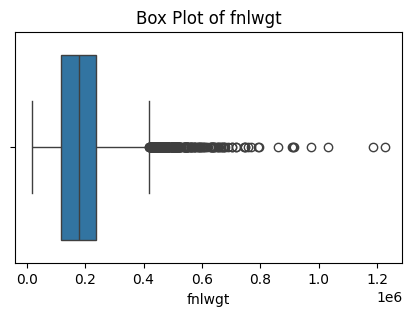

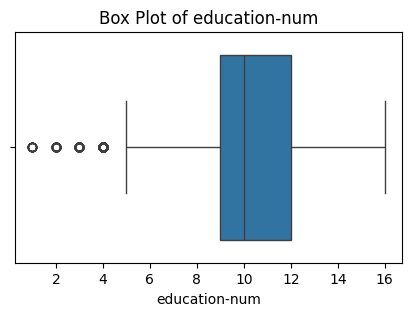

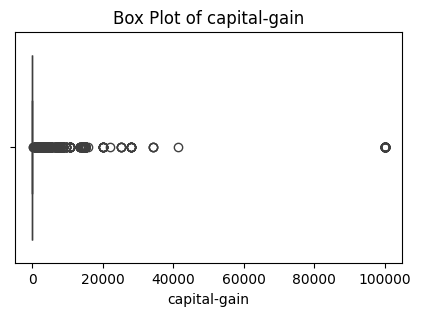

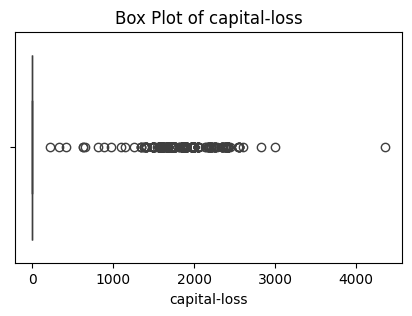

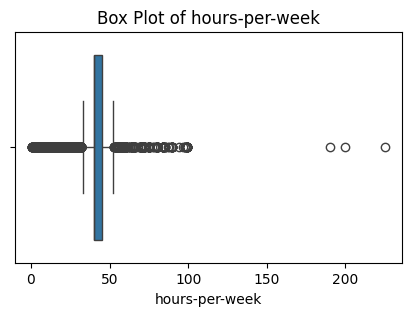

{'age': 73,
 'fnlwgt': 291,
 'education-num': 341,
 'capital-gain': 783,
 'capital-loss': 460,
 'hours-per-week': 2519}

In [52]:
num_cols = adult_data.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in num_cols:
    Q1 = adult_data[col].quantile(0.25)
    Q3 = adult_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = adult_data[
        (adult_data[col] < lower_bound) | (adult_data[col] > upper_bound)
    ]
    outlier_summary[col] = outliers.shape[0]

    plt.figure(figsize=(5, 3))
    sns.boxplot(x=adult_data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


outlier_summary

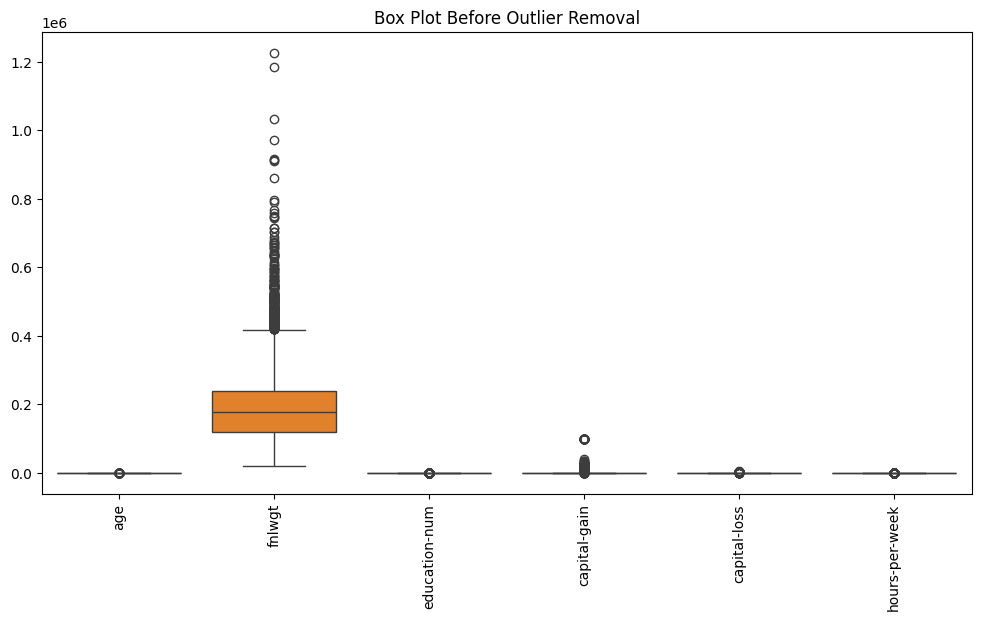

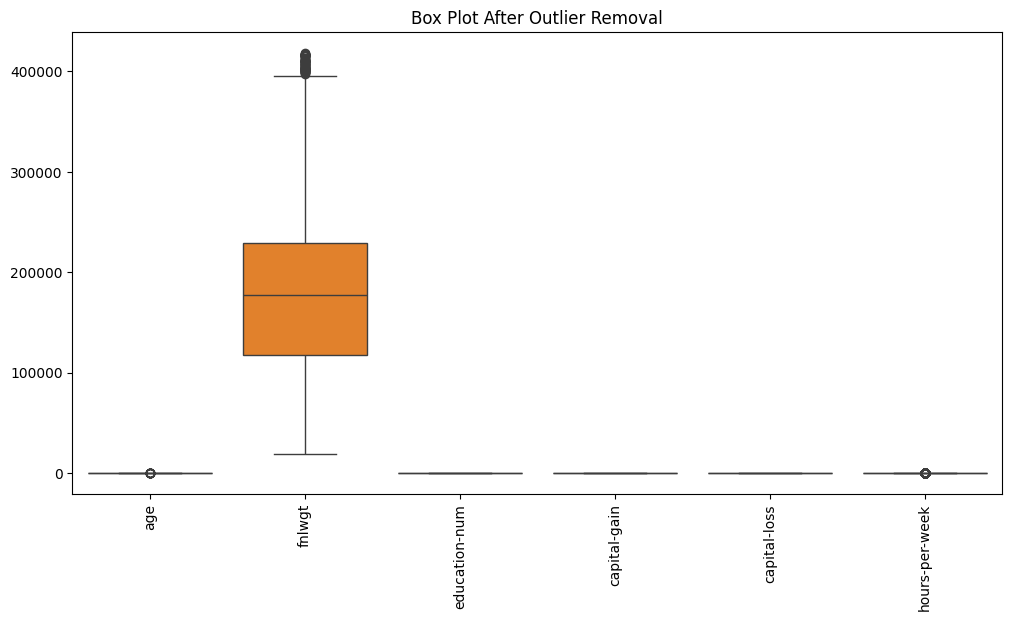

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9531,65.0,Private,273569,HS-grad,9,Widowed,Prof-specialty,Unmarried,White,Male,0.0,0.0,40.0,United-States,<=50K
9532,43.0,Private,153160,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
9533,48.0,Self-emp-not-inc,167918,Masters,14,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0.0,0.0,50.0,India,<=50K
9538,52.0,Local-gov,246197,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [53]:
num_cols = adult_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=adult_data[num_cols])
plt.xticks(rotation=90)
plt.title("Box Plot Before Outlier Removal")
plt.show()


outlier_rows = adult_data.copy()

for col in num_cols:
    Q1 = adult_data[col].quantile(0.25)
    Q3 = adult_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_rows = outlier_rows[
        (outlier_rows[col] >= lower) & (outlier_rows[col] <= upper)
    ]

plt.figure(figsize=(12, 6))
sns.boxplot(data=outlier_rows[num_cols])
plt.xticks(rotation=90)
plt.title("Box Plot After Outlier Removal")
plt.show()


outlier_rows


#Encoding

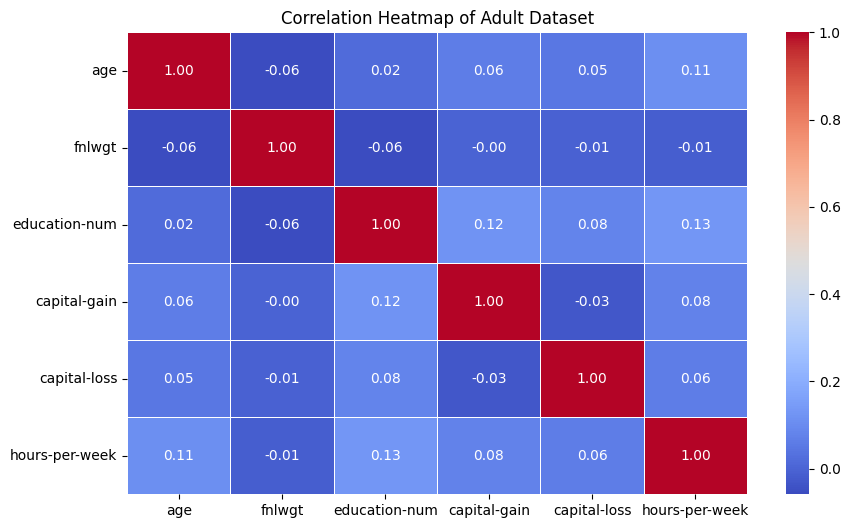

In [54]:
num_cols = adult_data.select_dtypes(include=['int64', 'float64'])

corr_matrix = num_cols.corr()
corr_matrix

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Adult Dataset")
plt.show()


#Encoding

In [55]:
cat_cols = adult_data.select_dtypes(include='object').columns
cat_cols

adult_data = pd.get_dummies(
    adult_data,
    columns=cat_cols,
    drop_first=True
)

adult_data.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39.0,77516,13,2174.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50.0,83311,13,0.0,0.0,13.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38.0,215646,9,0.0,0.0,40.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53.0,234721,7,0.0,0.0,40.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28.0,338409,13,0.0,0.0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


#Scaling

In [56]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(adult_data)
data_scaled


array([[ 0.04502921, -1.06771205,  1.1513281 , ..., -0.04697176,
        -0.02048187, -0.56011685],
       [ 0.85408224, -1.01288063,  1.1513281 , ..., -0.04697176,
        -0.02048187, -0.56011685],
       [-0.02852107,  0.2392534 , -0.42136638, ..., -0.04697176,
        -0.02048187, -0.56011685],
       ...,
       [ 1.00118279,  0.52832241, -0.42136638, ..., -0.04697176,
        -0.02048187, -0.56011685],
       [ 1.00118279,  0.0208455 , -0.02819276, ..., -0.04697176,
        -0.02048187, -0.56011685],
       [-1.4259763 ,  0.50862284, -0.42136638, ..., -0.04697176,
        -0.02048187, -0.56011685]])

#PCA

In [57]:
# Assuming 'income' is the target column
X = adult_data.drop('income', axis=1, errors='ignore')


In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [61]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

imputer = SimpleImputer(strategy='mean')
X_scaled = imputer.fit_transform(X_scaled)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(X_pca.shape)


(9539, 98)


In [62]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([3.80650043e-02, 2.72581449e-02, 2.54476995e-02, 2.10102565e-02,
       1.89497377e-02, 1.80749552e-02, 1.58616595e-02, 1.54793092e-02,
       1.46436815e-02, 1.37938296e-02, 1.35928303e-02, 1.29302392e-02,
       1.28775715e-02, 1.24911050e-02, 1.23287027e-02, 1.22383022e-02,
       1.21594905e-02, 1.19738584e-02, 1.18117861e-02, 1.17292956e-02,
       1.16275086e-02, 1.14607657e-02, 1.14114084e-02, 1.12559022e-02,
       1.12343230e-02, 1.11627842e-02, 1.10453182e-02, 1.10165423e-02,
       1.08268746e-02, 1.07888496e-02, 1.06989442e-02, 1.06549997e-02,
       1.06255335e-02, 1.05467144e-02, 1.05227179e-02, 1.04370363e-02,
       1.04334628e-02, 1.03935926e-02, 1.03718217e-02, 1.03101048e-02,
       1.02740514e-02, 1.02498884e-02, 1.02398481e-02, 1.02373234e-02,
       1.02239738e-02, 1.02166219e-02, 1.02101638e-02, 1.02036549e-02,
       1.01982133e-02, 1.01921991e-02, 1.01816576e-02, 1.01751533e-02,
       1.01629565e-02, 1.01444359e-02, 1.01032165e-02, 1.00634941e-02,
      

In [63]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)


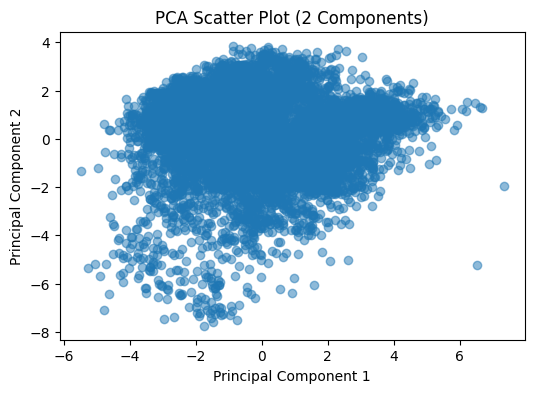

In [64]:
plt.figure(figsize=(6, 4))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot (2 Components)')
plt.show()


In [67]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np

imputer = SimpleImputer(strategy='mean')
data_scaled = imputer.fit_transform(data_scaled)


pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(data_scaled)

print(data_pca.shape)

(9539, 76)


#Clustering

#Kmeans

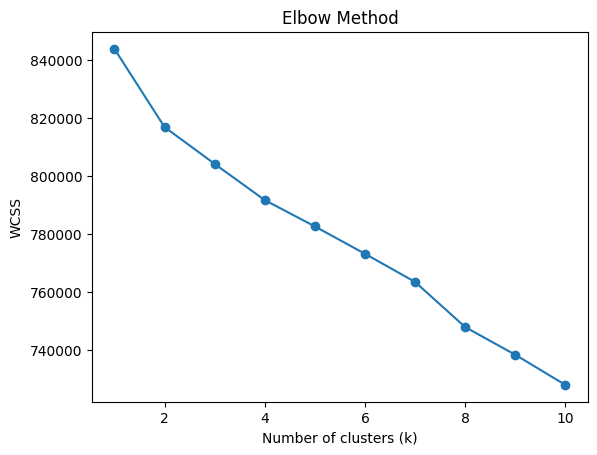

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [69]:
scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_pca)
    score = silhouette_score(data_pca, labels)
    scores[k] = score
    print(f"k={k}, silhouette score={score:.3f}")


best_k = max(scores, key=scores.get)
print("silhouette:", best_k)

k=2, silhouette score=0.061
k=3, silhouette score=0.054
k=4, silhouette score=0.052
k=5, silhouette score=0.057
k=6, silhouette score=0.057
k=7, silhouette score=0.058
k=8, silhouette score=0.045
k=9, silhouette score=0.047
k=10, silhouette score=0.061
silhouette: 10


In [70]:
best_k = 2

kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(data_pca)


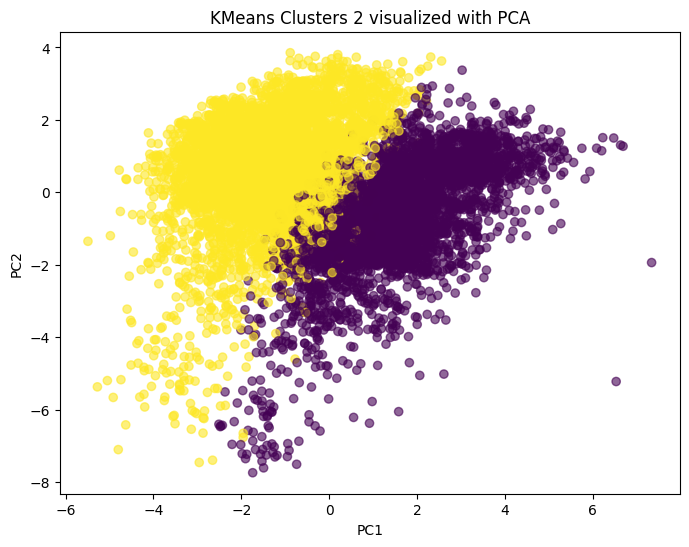

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"KMeans Clusters {best_k} visualized with PCA")
plt.show()

#Agglomerative

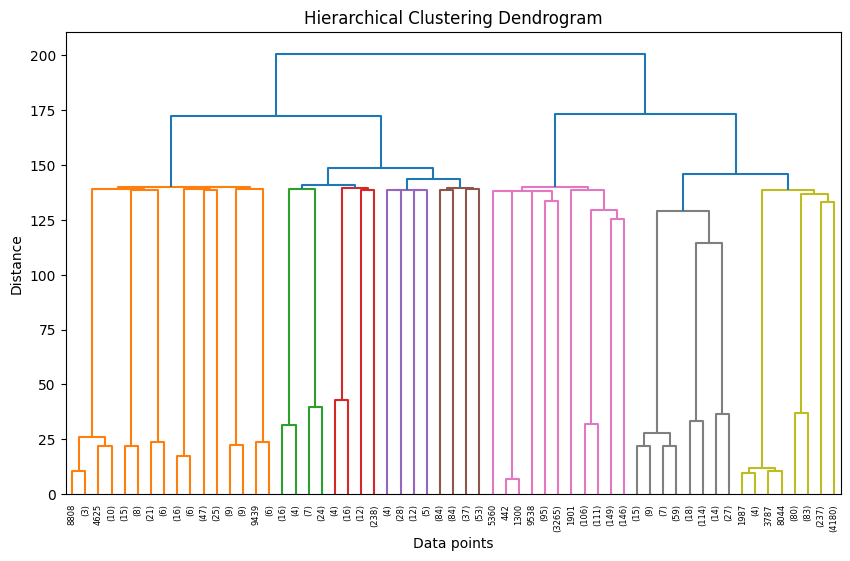

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

mergings = linkage(X, method='ward')
plt.figure(figsize=(10,6))
dendrogram(mergings, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [76]:
from sklearn.cluster import AgglomerativeClustering
for i in range(2,11):
   hc = AgglomerativeClustering(n_clusters= i,linkage= 'ward')
   hc_lables = hc.fit_predict(X_scaled)
   sil_score = silhouette_score(X_scaled,hc_lables)
   print('silhouette score for k = {} is {}'.format(i,sil_score))

silhouette score for k = 2 is 0.5089608322017307
silhouette score for k = 3 is 0.01649813048547189
silhouette score for k = 4 is 0.018258822920133543
silhouette score for k = 5 is 0.021067615965667075
silhouette score for k = 6 is 0.022370873311493362
silhouette score for k = 7 is 0.023476984747812814
silhouette score for k = 8 is 0.02556465460830586
silhouette score for k = 9 is 0.021719602773631143
silhouette score for k = 10 is 0.023241712756109402


In [77]:
hc = AgglomerativeClustering(n_clusters= 5,linkage= 'ward')
hc_labels = hc.fit_predict(X_scaled)
adult_data['hc_clusters'] = hc_labels
adult_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K,hc_clusters
0,39.0,77516,13,2174.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
1,50.0,83311,13,0.0,0.0,13.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
2,38.0,215646,9,0.0,0.0,40.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,2
3,53.0,234721,7,0.0,0.0,40.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,2
4,28.0,338409,13,0.0,0.0,40.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,1


In [79]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=k)
agg_labels = agg.fit_predict(data_pca)

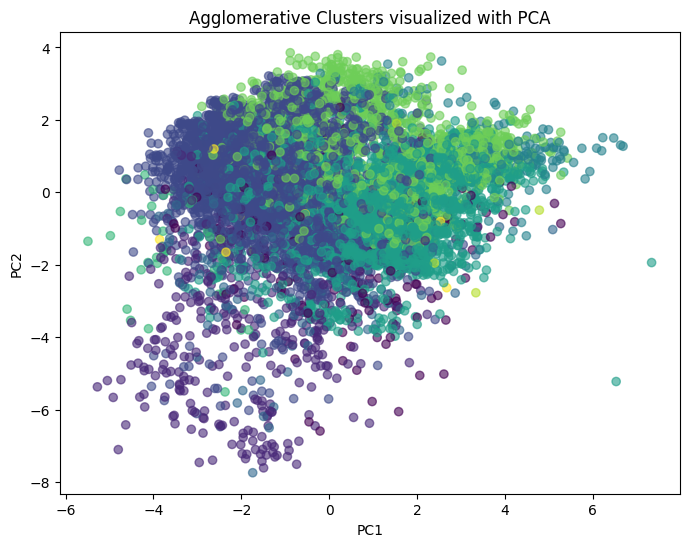

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(
    data_pca[:, 0],
    data_pca[:, 1],
    c=agg_labels,
    cmap='viridis',
    alpha=0.6
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Agglomerative Clusters visualized with PCA")
plt.show()
